In [ ]:
medical_charges_url='https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [ ]:
medical_charges_url

'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [ ]:
from urllib.request import urlretrieve

In [ ]:
urlretrieve(medical_charges_url,'medical.csv')


('medical.csv', <http.client.HTTPMessage at 0x7e106f4dbe50>)

In [ ]:
import pandas as pd

In [ ]:
medical_df = pd.read_csv('medical.csv')

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
!pip install plotly matplotlib seaborn

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']= (10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'

**AGE** (1st Column)

In [ ]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [ ]:
fig = px.histogram(medical_df,
                   x='age',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Age')

fig.update_layout(bargap=0.1)
fig.show()

BMI (2nd column)

In [ ]:
fig = px.histogram(medical_df,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of BMI')

fig.update_layout(bargap=0.1)
fig.show()

Charges (3rd Column)

In [ ]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal = 'box',
                   color='smoker',
                   color_discrete_sequence=['green','grey'],
                   title = 'Annual Medical Charges')

fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal = 'box',
                   color='sex',
                   color_discrete_sequence=['green','grey'],
                   title = 'Annual Medical Charges')

fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal = 'box',
                   color='region',
                   color_discrete_sequence=['green','grey'],
                   title = 'Annual Medical Charges')

fig.update_layout(bargap=0.1)
fig.show()

**Smoke**r (4th Column)

In [ ]:
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
px.histogram(medical_df, x='smoker',color='sex',title='Smoker')

**Age and Charges**

In [ ]:
fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age vs. Charges'
                 )
fig.update_traces(marker_size=5)
fig.show()

**BMI Charges **

In [ ]:
fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age vs. Charges'
                 )
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
px.scatter(medical_df,x='children',y='charges')

In [ ]:
px.violin(medical_df,x='children',y='charges')

In [ ]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [ ]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

In [ ]:
medical_df.charges.corr(medical_df.children)

0.06799822684790478

In [ ]:
# medical_df.charges.corr(medical_df.smoker)

In [ ]:
smoker_values={'no':0,'yes':1}
smoker_numeric=medical_df.smoker.map(smoker_values)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [ ]:
medical_df.charges.corr(smoker_numeric)

0.787251430498478

In [ ]:
medical_df.corr()

<ipython-input-147-cf93875bab50>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<ipython-input-148-94caec092285>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



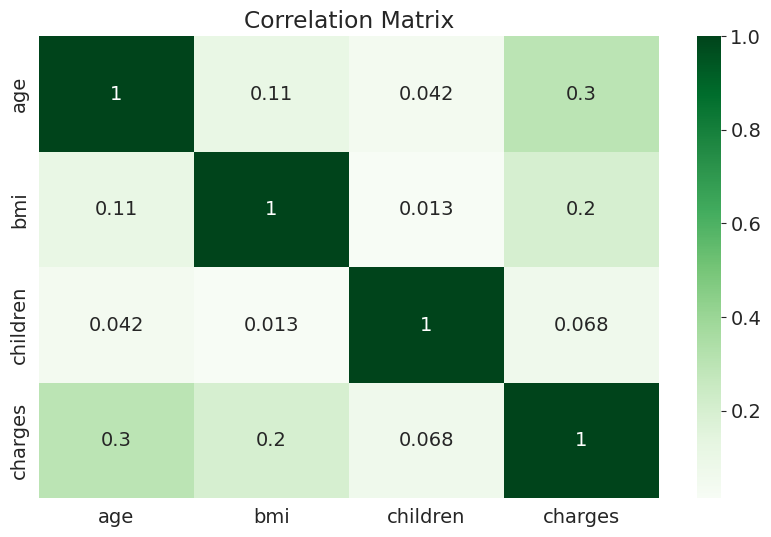

In [ ]:
sns.heatmap(medical_df.corr(),cmap='Greens',annot=True)
plt.title('Correlation Matrix');

In [ ]:
non_smoker_df = medical_df[medical_df.smoker =='no']
non_smoker_df.describe()


,age,bmi,children,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
count,1064.000000,1064.000000,1064.000000,1064.000000,1064.0,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000
mean,39.385338,30.651795,1.090226,8434.268298,0.0,0.485902,0.241541,0.250940,0.256579,0.250940
std,14.083410,6.043111,1.218136,5993.781819,0.0,0.500036,0.428219,0.433758,0.436950,0.433758
min,18.000000,15.960000,0.000000,1121.873900,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.750000,26.315000,0.000000,3986.438700,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,30.352500,1.000000,7345.405300,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,52.000000,34.430000,2.000000,11362.887050,0.0,1.000000,0.000000,1.000000,1.000000,1.000000
max,64.000000,53.130000,5.000000,36910.608030,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


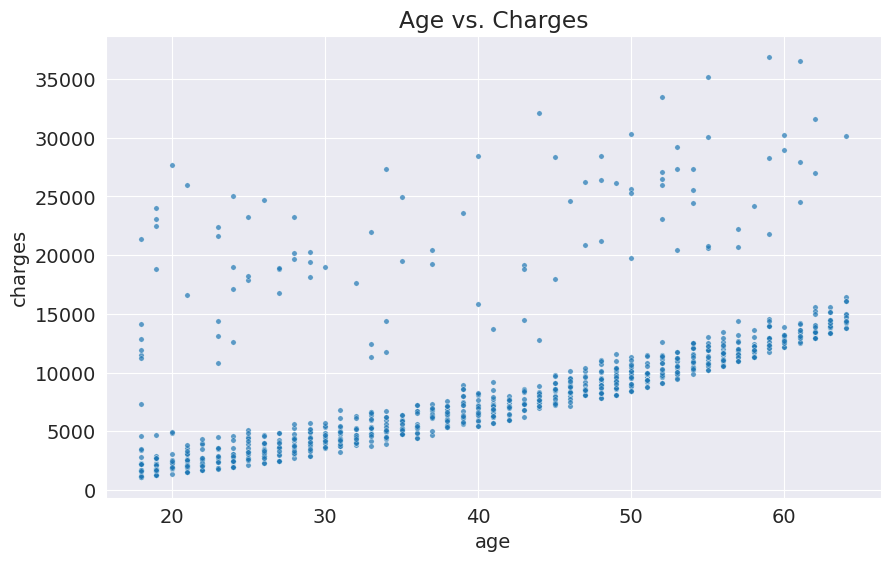

In [ ]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df,x='age',y='charges', alpha=0.7,s=15);

In [ ]:
def estimate_charges(age,w,b):
  return (w*age)+b

In [ ]:
w= 50
b=100
estimate_charges(30,w,b)

1600

In [ ]:
estimate_charges(40,w,b)

2100

In [ ]:
ages= non_smoker_df.age
estimated_charges=estimate_charges(ages,w,b)

In [ ]:
ages= non_smoker_df.age
ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [ ]:
estimated_charges=estimate_charges(ages,w,b)
estimated_charges


1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

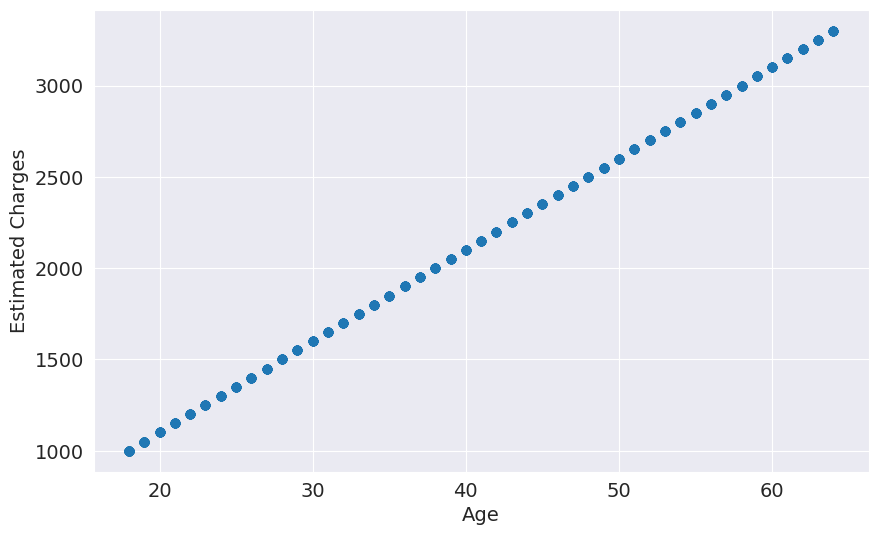

In [ ]:
plt.scatter(ages, estimated_charges);
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

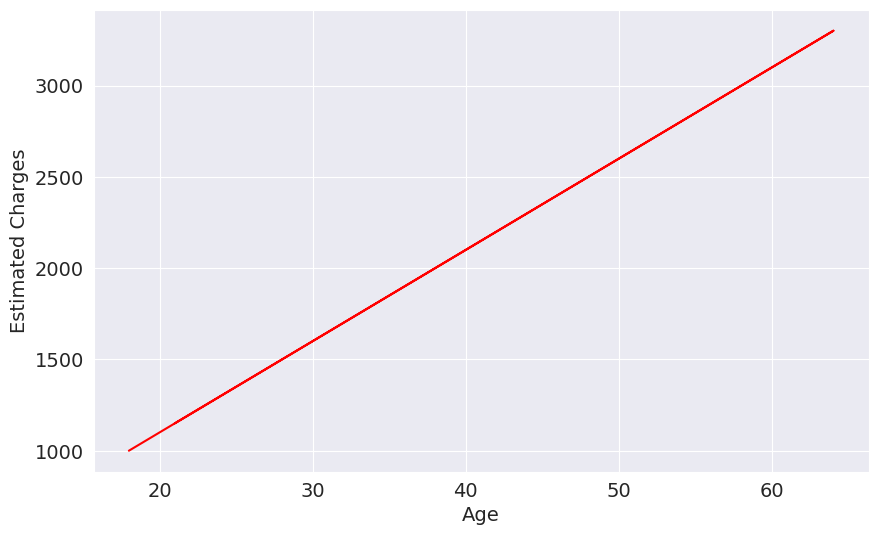

In [ ]:
plt.plot(ages, estimated_charges, 'r-');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

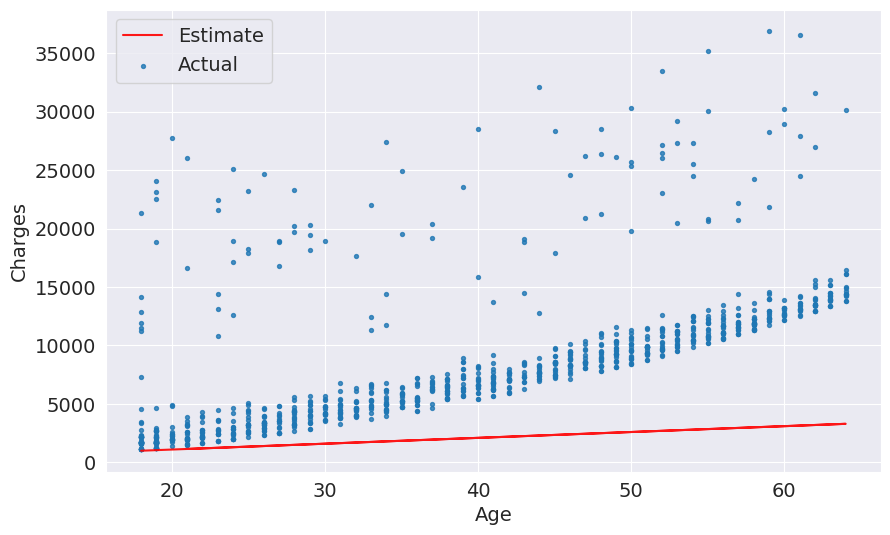

In [ ]:
target = non_smoker_df.charges
plt.plot(ages, estimated_charges, 'r', alpha=0.9)

plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate','Actual'])

In [ ]:
def try_parameters(w,b):
  ages=non_smoker_df.age
  target=non_smoker_df.charges

  estimated_charges = estimate_charges(ages, w,b)

  plt.plot(ages, estimated_charges,'r',alpha=0.9);
  plt.scatter(ages, target, s=8, alpha=0.8);
  plt.xlabel('Age');
  plt.ylabel('Charges');
  plt.legend(['Estimate','Actual']);
  print(estimated_charges)

1       1280
2       1880
3       2180
4       2120
5       2060
        ... 
1332    3320
1333    3200
1334    1280
1335    1280
1336    1460
Name: age, Length: 1064, dtype: int64


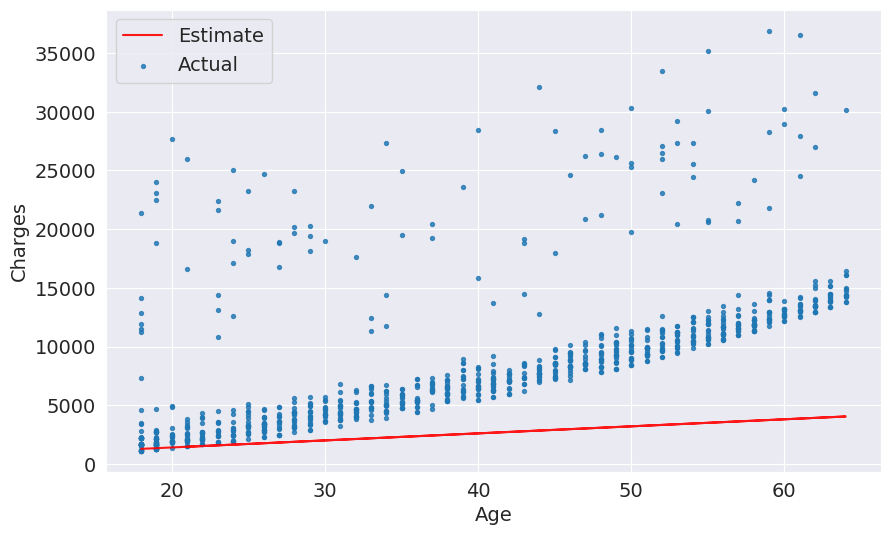

In [ ]:
try_parameters(60,200)

1       1280
2       1880
3       2180
4       2120
5       2060
        ... 
1332    3320
1333    3200
1334    1280
1335    1280
1336    1460
Name: age, Length: 1064, dtype: int64


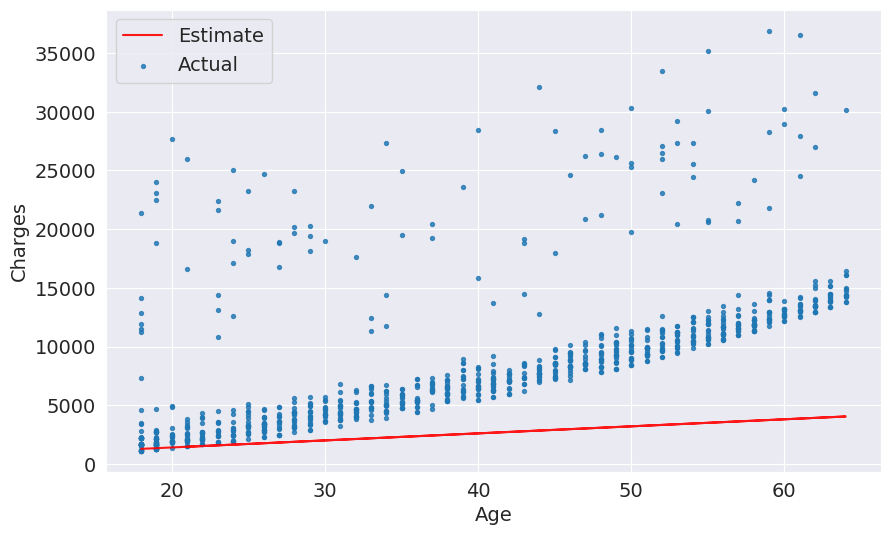

In [ ]:
try_parameters(60,200)

1       12200
2       16200
3       18200
4       17800
5       17400
        ...  
1332    25800
1333    25000
1334    12200
1335    12200
1336    13400
Name: age, Length: 1064, dtype: int64


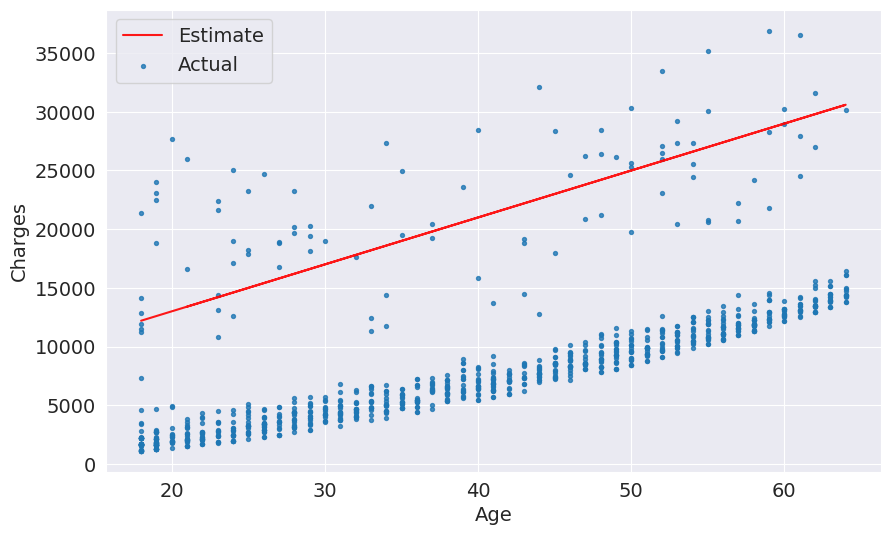

In [ ]:
try_parameters(400,5000)

1        8200
2       12200
3       14200
4       13800
5       13400
        ...  
1332    21800
1333    21000
1334     8200
1335     8200
1336     9400
Name: age, Length: 1064, dtype: int64


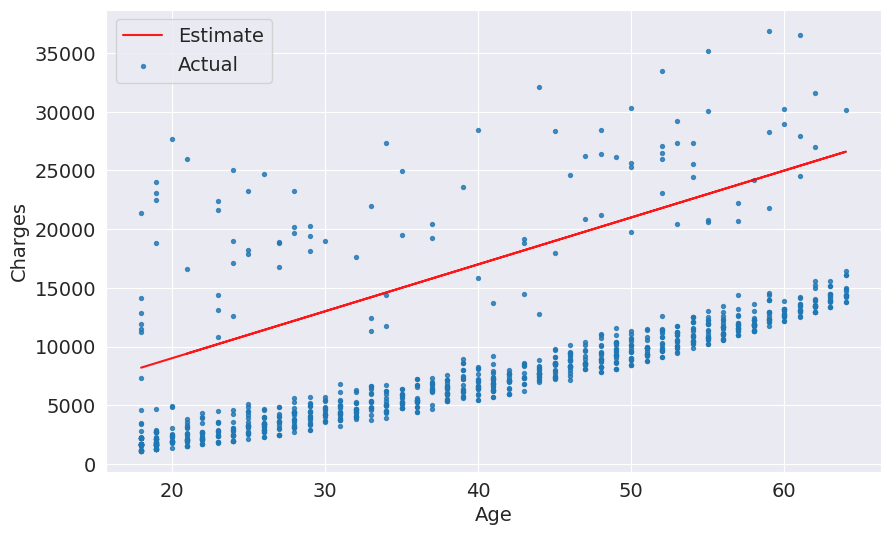

In [ ]:
try_parameters(400,1000)

1        7300
2       11300
3       13300
4       12900
5       12500
        ...  
1332    20900
1333    20100
1334     7300
1335     7300
1336     8500
Name: age, Length: 1064, dtype: int64


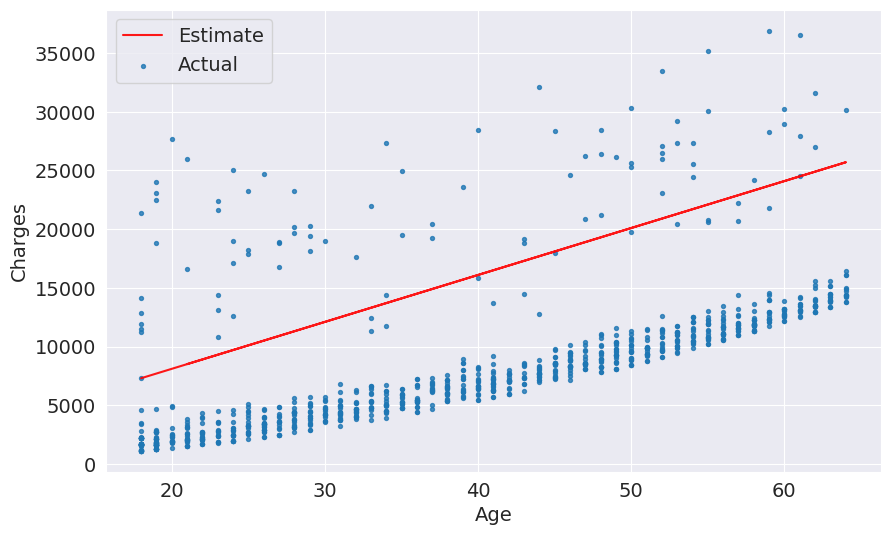

In [ ]:
try_parameters(400,100)

1         860
2        3560
3        4910
4        4640
5        4370
        ...  
1332    10040
1333     9500
1334      860
1335      860
1336     1670
Name: age, Length: 1064, dtype: int64


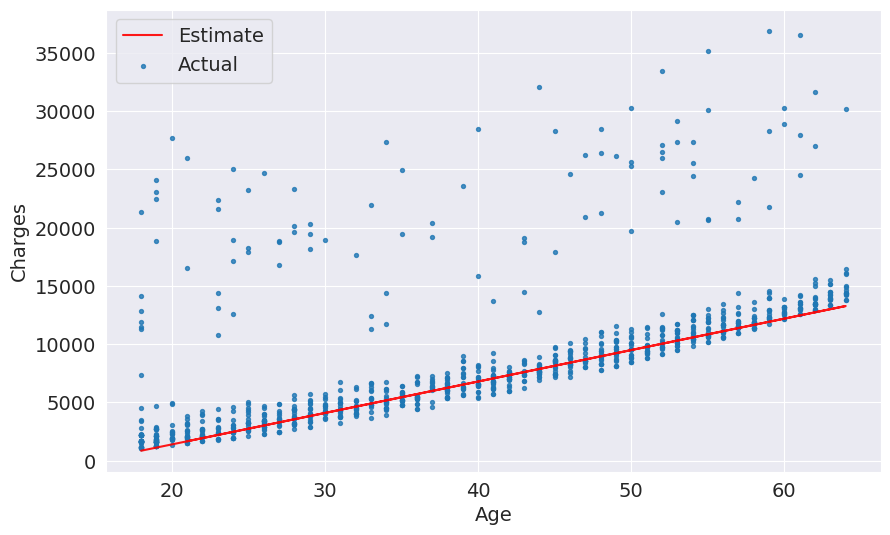

In [ ]:
try_parameters(270,-4000)


In [ ]:
targets= non_smoker_df.charges
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [ ]:
predictions = estimated_charges
predictions

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [ ]:
import numpy as np

In [ ]:
def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(targets-predictions)))

In [ ]:
w=50
b=100

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64


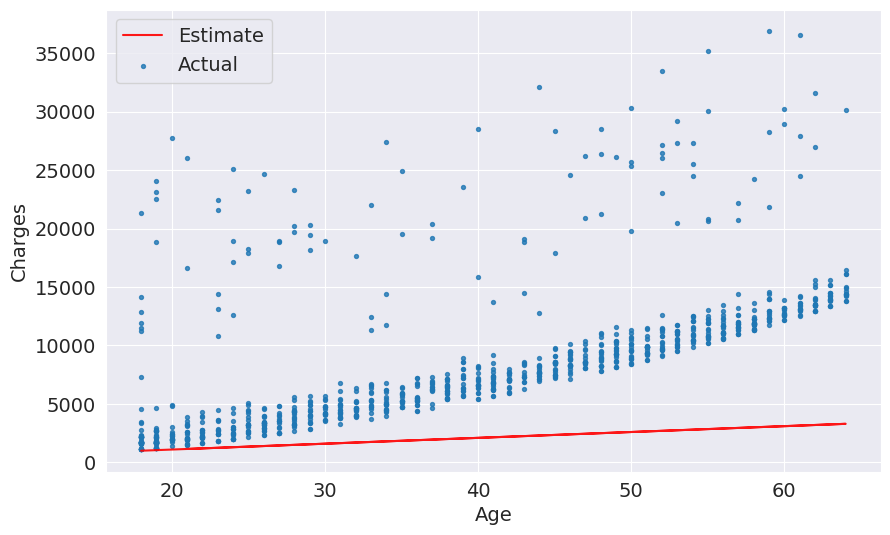

In [ ]:
try_parameters(w,b)

In [ ]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [ ]:
rmse(targets, predicted)

8461.949562575493

In [ ]:
def try_parameters(w,b):
  ages=non_smoker_df.age
  target=non_smoker_df.charges
  predictions = estimate_charges(ages,w,b)

  plt.plot(ages, predictions, 'r',alpha=0.9);
  plt.scatter(ages, target, s=8, alpha=0.9);
  plt.xlabel('Age');
  plt.ylabel('Charges');
  plt.legend(['Predictions','Actual']);

  loss = rmse(target, predictions)
  print("RMSE Loss:",loss)


RMSE Loss: 8461.949562575493


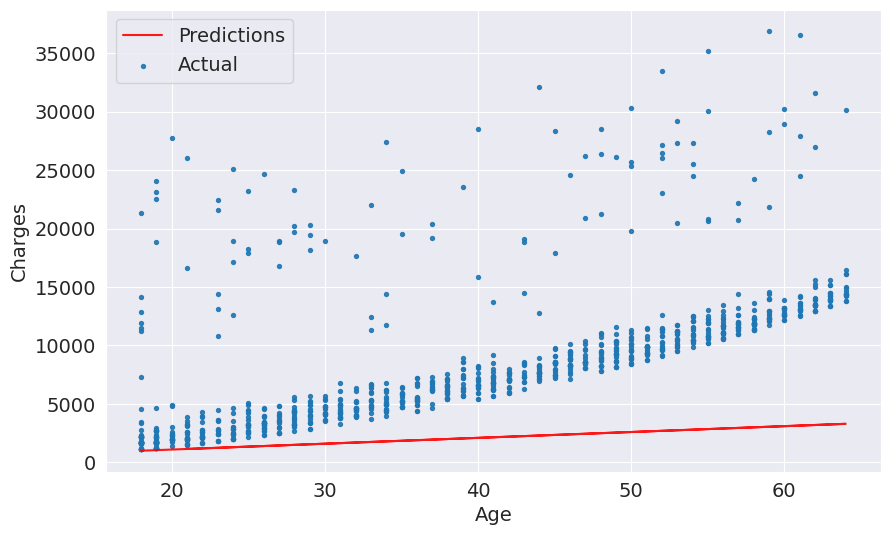

In [ ]:
try_parameters(50,100)

RMSE Loss: 4873.301227056433


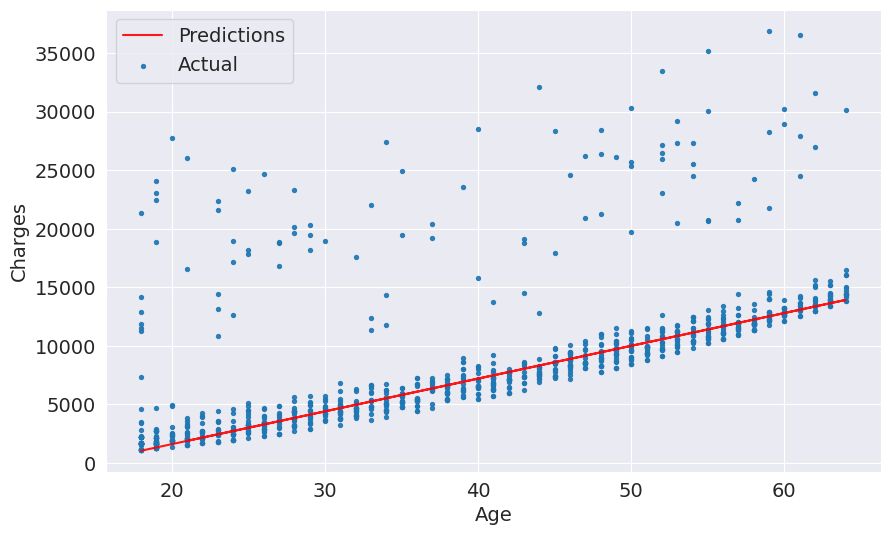

In [ ]:
try_parameters(280,-4000)

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [ ]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targets.shape:',targets.shape)

inputs.shape : (1064, 1)
targets.shape: (1064,)


In [ ]:
model.fit(inputs, targets)

LinearRegression()

In [ ]:
model.predict(np.array([[23],
                        [37],
                        [61]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [ ]:
predictions = model.predict(inputs)

In [ ]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [ ]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [ ]:
rmse(targets, predictions)

4662.505766636395

In [ ]:
model.coef_

array([267.24891283])

In [ ]:
model.intercept_

-2091.4205565650864

RMSE Loss: 4662.505766636395


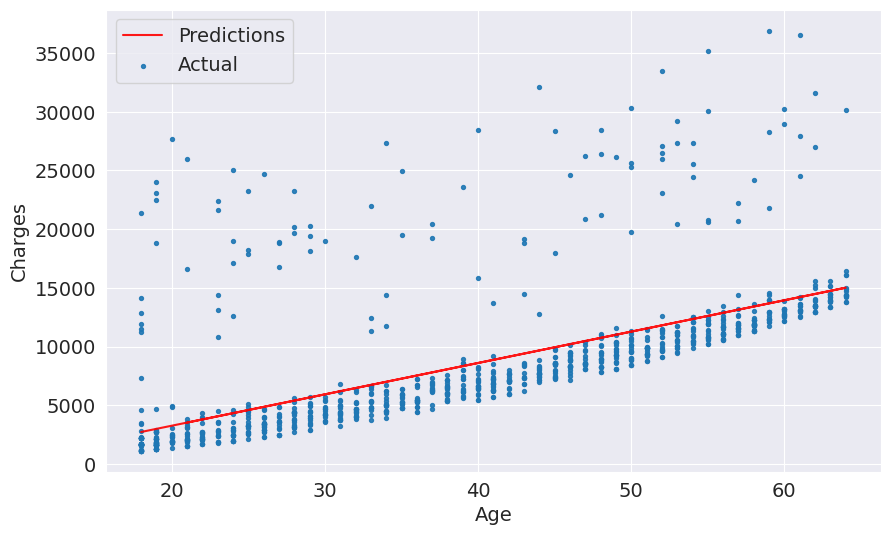

In [ ]:
try_parameters(model.coef_,model.intercept_)

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
model = SGDRegressor()

In [ ]:
help(model.fit)

Help on method fit in module sklearn.linear_model._stochastic_gradient:

fit(X, y, coef_init=None, intercept_init=None, sample_weight=None) method of sklearn.linear_model._stochastic_gradient.SGDRegressor instance
    Fit linear model with Stochastic Gradient Descent.
    
    Parameters
    ----------
    X : {array-like, sparse matrix}, shape (n_samples, n_features)
        Training data.
    
    y : ndarray of shape (n_samples,)
        Target values.
    
    coef_init : ndarray of shape (n_features,), default=None
        The initial coefficients to warm-start the optimization.
    
    intercept_init : ndarray of shape (1,), default=None
        The initial intercept to warm-start the optimization.
    
    sample_weight : array-like, shape (n_samples,), default=None
        Weights applied to individual samples (1. for unweighted).
    
    Returns
    -------
    self : object
        Fitted `SGDRegressor` estimator.



In [ ]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape:', inputs.shape)
print('targets.shape:', targets.shape)

inputs.shape: (1064, 1)
targets.shape: (1064,)


In [ ]:
model.fit(inputs,targets)

SGDRegressor()

In [ ]:
model.predict(np.array([[23],
                        [37],
                        [61]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but SGDRegressor was fitted with feature names



array([ 2490.28684246,  6363.46499177, 13003.198962  ])

In [ ]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [ ]:
predictions=model.predict(inputs)
predictions

array([1107.008932  , 3873.56475293, 5256.84266339, ..., 1107.008932  ,
       1107.008932  , 1936.97567828])

In [ ]:
rmse(targets, predictions)

4873.098976774746

RMSE Loss: 4873.098976774746


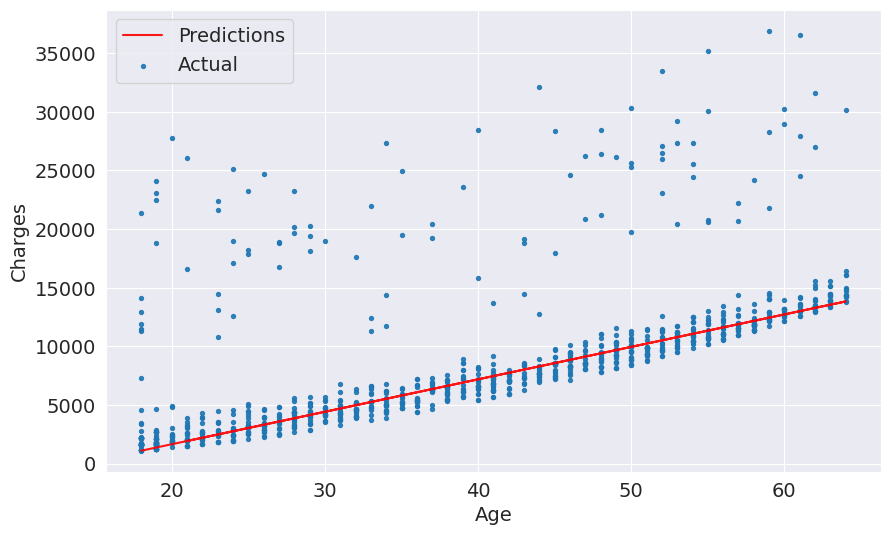

In [ ]:
try_parameters(model.coef_, model.intercept_)

In [ ]:
inputs, targets = non_smoker_df[['age','bmi']],non_smoker_df['charges']
model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print('Loss:',loss)

Loss: 4662.3128354612945


In [ ]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.0840365431283327

In [ ]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488727)

In [ ]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.13892870453542192

In [ ]:
inputs, targets = non_smoker_df[['age','bmi','children']],non_smoker_df['charges']
model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print('Loss:',loss)

Loss: 4608.470405038247


In [ ]:
inputs, targets = medical_df[['age','bmi','children']],medical_df['charges']
model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print('Loss:',loss)

Loss: 11355.317901125973


In [ ]:
inputs, targets = medical_df[['age','bmi','children']],medical_df['charges']
model = SGDRegressor().fit(inputs, targets)

predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print('Loss:',loss)

Loss: 601958882.753299


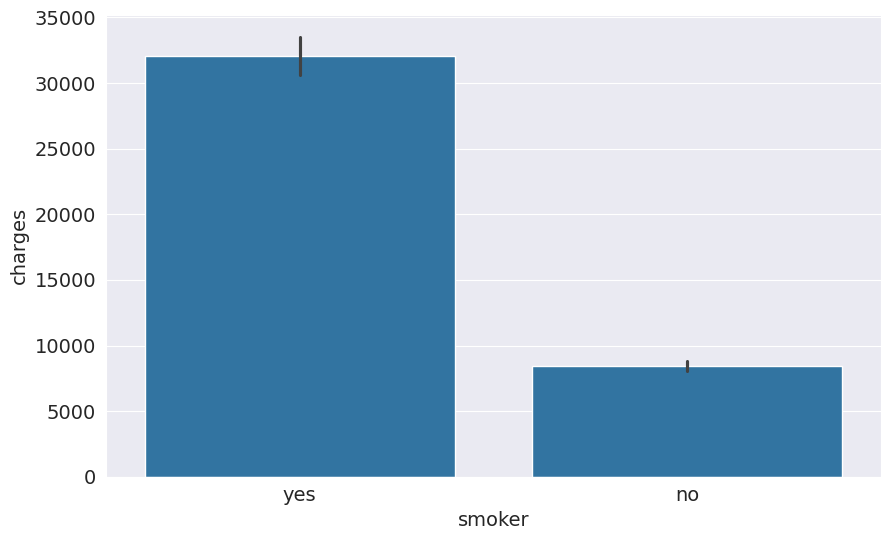

In [ ]:
sns.barplot(data=medical_df,x='smoker',y='charges');

In [ ]:
smoker_codes = {'no':0,'yes':1}
medical_df['smoker_code']=medical_df.smoker.map(smoker_codes)

In [ ]:
medical_df.charges.corr(medical_df.smoker_code)

0.787251430498478

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [ ]:
inputs, targets = medical_df[['age','bmi','children','smoker_code']],medical_df['charges']
model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print('Loss:',loss)

Loss: 6056.439217188081


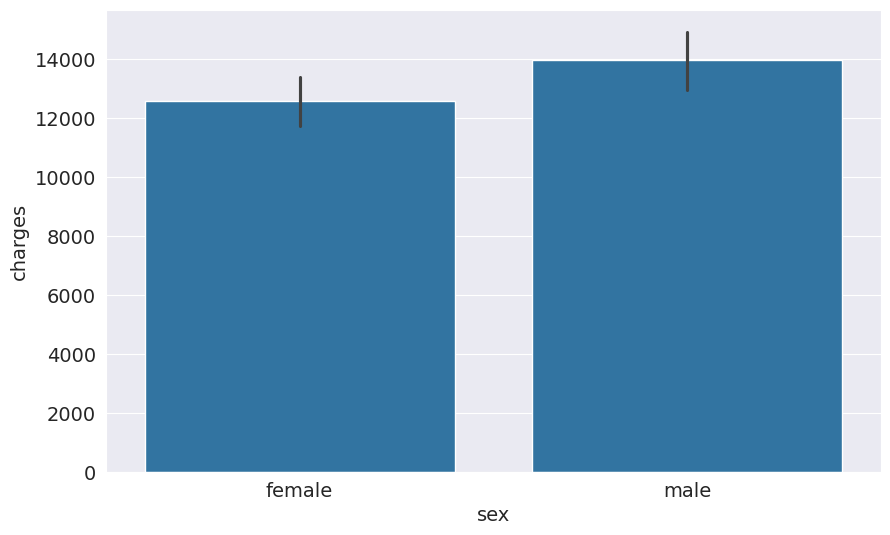

In [ ]:
sns.barplot(data=medical_df,x='sex',y='charges');

In [ ]:
sex_codes = {'female':0,'male':1}


In [ ]:
medical_df['sex_code']=medical_df.sex.map(sex_codes)

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [ ]:
medical_df.charges.corr(medical_df.sex_code)

0.057292062202025484

In [ ]:
inputs, targets = medical_df[['age','bmi','children','smoker_code','sex_code']],medical_df['charges']
model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print('Loss:',loss)

Loss: 6056.100708754546


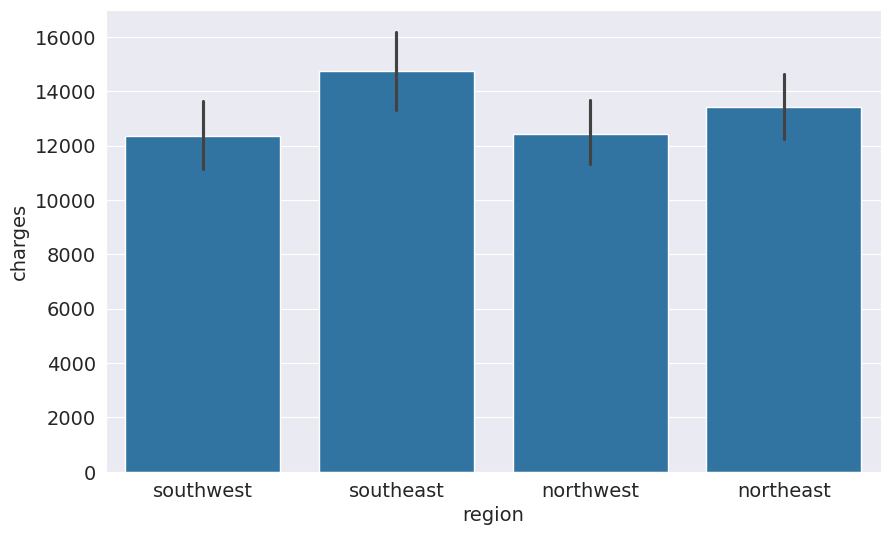

In [ ]:
sns.barplot(data=medical_df,x='region',y='charges');

In [ ]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
medical_df[['region']]

,region
0,southwest
1,southeast
2,southeast
3,northwest
4,northwest
...,...
1333,northwest
1334,northeast
1335,southeast
1336,southwest


In [ ]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [ ]:
medical_df[['northeast','northwest','southeast','southwest']] = one_hot

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [ ]:
inputs, targets = medical_df[['age','bmi','children','smoker_code','sex_code','northeast','northwest','southeast','southwest']],medical_df['charges']
model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print('Loss:',loss)

Loss: 6041.6796511744515


RMSE Loss: 4760.13272734985


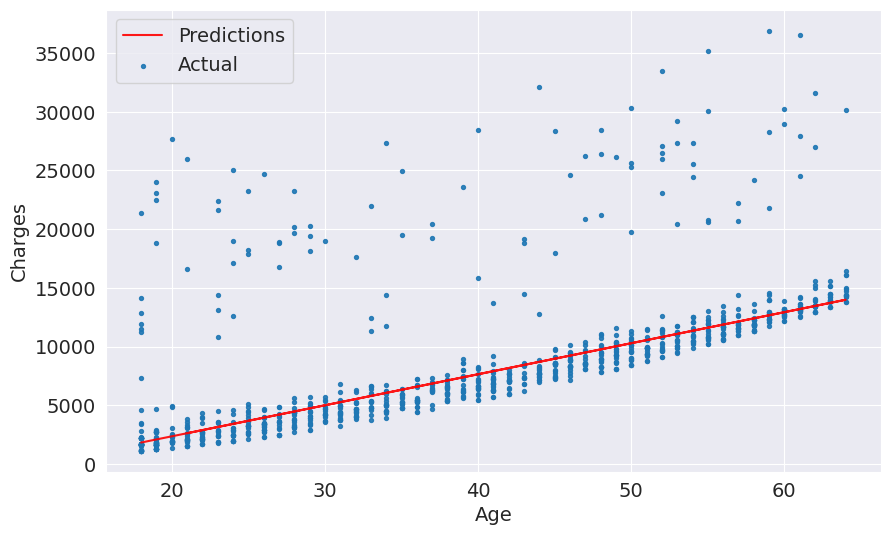

In [ ]:
try_parameters(model.coef_[0], model.intercept_)

In [ ]:
predictions

array([25293.7130284 ,  3448.60283431,  6706.9884907 , ...,
        4149.13248568,  1246.58493898, 37085.62326757])

In [ ]:
model.coef_[0]

256.8563525373483

In [ ]:
model.intercept_

-12525.547811195444

In [ ]:
# for i in range(0,10):
#   try_parameters(model.coef_[i], model.intercept_)



**Binary** **Categories**

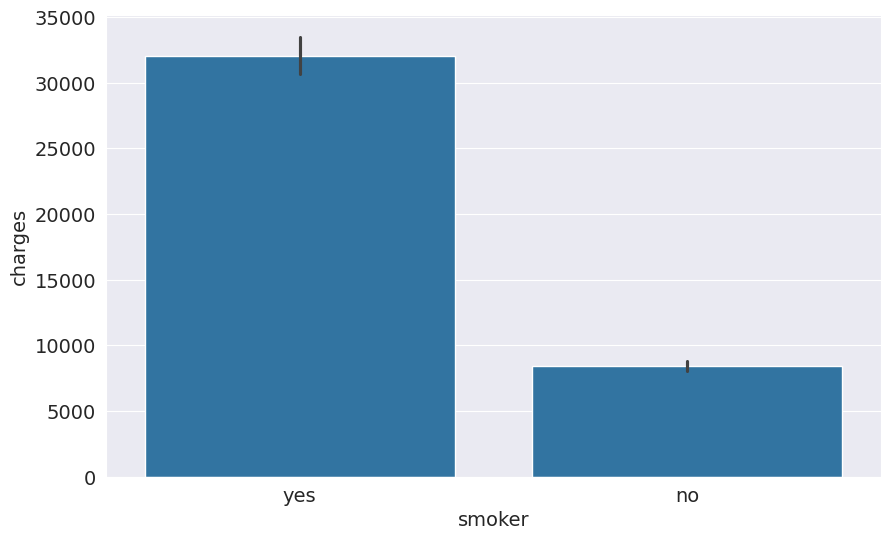

In [ ]:
sns.barplot(data=medical_df, x='smoker',y='charges');

In [ ]:
smoker_codes = {'no':0,'yes': 1}
medical_df['smoker_code']= medical_df.smoker.map(smoker_codes)

In [ ]:
medical_df.charges.corr(medical_df.smoker_code)

0.787251430498478

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [ ]:
input_cols = ['age', 'bmi','children','sex_code','northwest','northeast','southwest','southeast']

In [ ]:
input_cols = ['age', 'bmi','children','sex_code','northwest','northeast','southwest','southeast']
inputs,targets = non_smoker_df[input_cols], non_smoker_df['charges']
model1 = LinearRegression().fit(inputs,targets)
predictions = model.predict(inputs)
loss = rmse(targets,predictions)
print('Loss:',loss)

Loss: 4573.074988795492


In [ ]:
medical_df[input_cols].loc[10]

age          25.00
bmi          26.22
children      0.00
sex_code      1.00
northwest     0.00
northeast     1.00
southwest     0.00
southeast     0.00
Name: 10, dtype: float64

In [ ]:
model1.predict([[28,30,2,1,0,0,1,0.]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([5022.22109195])

In [ ]:
smoker_df = medical_df[medical_df.smoker =='yes']
smoker_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
11,62,female,26.290,0,yes,southeast,27808.72510,1,0,0.0,0.0,1.0,0.0
14,27,male,42.130,0,yes,southeast,39611.75770,1,1,0.0,0.0,1.0,0.0
19,30,male,35.300,0,yes,southwest,36837.46700,1,1,0.0,0.0,0.0,1.0
23,34,female,31.920,1,yes,northeast,37701.87680,1,0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600,1,0,0.0,0.0,0.0,1.0
1314,30,female,23.655,3,yes,northwest,18765.87545,1,0,0.0,1.0,0.0,0.0
1321,62,male,26.695,0,yes,northeast,28101.33305,1,1,1.0,0.0,0.0,0.0
1323,42,female,40.370,2,yes,southeast,43896.37630,1,0,0.0,0.0,1.0,0.0


In [ ]:
input_cols = ['age', 'bmi','children','sex_code','northwest','northeast','southwest','southeast']
inputs,targets = smoker_df[input_cols], smoker_df['charges']
model2 = LinearRegression().fit(inputs,targets)
predictions = model.predict(inputs)
loss = rmse(targets,predictions)
print('Loss:',loss)

Loss: 5668.4678821121515


In [ ]:
model2.predict([[28,30,2,1,0,0,1,0.]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([28623.3903031])

In [ ]:
model2.coef_

array([  267.40438625,  1475.54562981,   182.73655059,  -388.1216487 ,
          64.86699592,   754.5850207 ,   318.70148002, -1138.15349664])

**Features Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
numeric_cols = ['age','bmi','children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [ ]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [ ]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [ ]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [ ]:
cat_cols = ['smoker_code','sex_code','northeast','northwest','southeast','southwest']
categorical_data = medical_df[cat_cols].values

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [ ]:
categorical_data

array([[1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0.]])

In [ ]:
inputs = np.concatenate((scaled_inputs,categorical_data),axis=1)

In [ ]:
inputs

array([[-1.43876426, -0.45332   , -0.90861367, ...,  0.        ,
         0.        ,  1.        ],
       [-1.50996545,  0.5096211 , -0.07876719, ...,  0.        ,
         1.        ,  0.        ],
       [-0.79795355,  0.38330685,  1.58092576, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367, ...,  0.        ,
         1.        ,  0.        ],
       [-1.29636188, -0.79781341, -0.90861367, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.55168573, -0.26138796, -0.90861367, ...,  1.        ,
         0.        ,  0.        ]])

In [ ]:
inputs = np.concatenate((scaled_inputs,categorical_data),axis=1)
targets = medical_df.charges

model = LinearRegression().fit(inputs,targets)

predictions = model.predict(inputs)

loss = rmse(targets,predictions)

print('Loss:',loss)

Loss: 6041.6796511744515


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
 inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

In [ ]:
targets_train

700     2020.55230
495     1967.02270
266    17179.52200
705     5375.03800
930     2927.06470
          ...     
608     4435.09420
106     2331.51900
280    22331.56680
770    27941.28758
780    18259.21600
Name: charges, Length: 1204, dtype: float64

In [ ]:
model = LinearRegression().fit(inputs_train, targets_train)

predictions_test = model.predict(inputs_test)

loss = rmse(targets_test, predictions_test)
print('Test Loss', loss)

Test Loss 6189.43471783966


In [ ]:
predictions_train = model.predict(inputs_train)

loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 6028.164529028494
